# **Muhamad Habibiebie Robbi**
---

##### **Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### **1. Load Data**

In [2]:
file_path = "D:/Documents/UNJEHH/SEMESTER 6/BOOTCAMP/DIBIMBING/Data/Klasifikasi Tingkat Kemiskinan di Indonesia.xlsx"  
data = pd.read_excel(file_path)


In [3]:
dataset = data.rename(columns={
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 'P0 Persen',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)': 'Mean Lama Sekolah 15+',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 'Pengeluaran perKapita',
    'Indeks Pembangunan Manusia': 'IPM',
    'Umur Harapan Hidup (Tahun)': 'Umur Harapan Hidup',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak': 'Akses Sanitasi Layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak': 'Akses Air Minum Layak',
    'Tingkat Pengangguran Terbuka': 'Pengangguran Terbuka',
    'Tingkat Partisipasi Angkatan Kerja': 'Partisipasi Angkatan Kerja',
    'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)': 'PDRB Harga Konstan',
    'Klasifikasi Kemiskinan': 'Klasifikasi Kemiskinan'
})

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Provinsi                    514 non-null    object 
 1   Kab/Kota                    514 non-null    object 
 2   P0 Persen                   514 non-null    float64
 3   Mean Lama Sekolah 15+       514 non-null    float64
 4   Pengeluaran perKapita       514 non-null    int64  
 5   IPM                         514 non-null    float64
 6   Umur Harapan Hidup          514 non-null    float64
 7   Akses Sanitasi Layak        514 non-null    float64
 8   Akses Air Minum Layak       514 non-null    float64
 9   Pengangguran Terbuka        514 non-null    float64
 10  Partisipasi Angkatan Kerja  514 non-null    float64
 11  PDRB Harga Konstan          514 non-null    int64  
 12  Klasifikasi Kemiskinan      514 non-null    int64  
dtypes: float64(8), int64(3), object(2)


### **2. Exploratory Data Analysis (EDA)**

In [4]:
print("Data Head:")
dataset.head()

Data Head:


,Provinsi,Kab/Kota,P0 Persen,Mean Lama Sekolah 15+,Pengeluaran perKapita,IPM,Umur Harapan Hidup,Akses Sanitasi Layak,Akses Air Minum Layak,Pengangguran Terbuka,Partisipasi Angkatan Kerja,PDRB Harga Konstan,Klasifikasi Kemiskinan
0,ACEH,Simeulue,18.98,9.48,7148,66.41,65.28,71.56,87.45,5.71,71.15,1648096,0
1,ACEH,Aceh Singkil,20.36,8.68,8776,69.22,67.43,69.56,78.58,8.36,62.85,1780419,1
2,ACEH,Aceh Selatan,13.18,8.88,8180,67.44,64.40,62.55,79.65,6.46,60.85,4345784,0
3,ACEH,Aceh Tenggara,13.41,9.67,8030,69.44,68.22,62.71,86.71,6.43,69.62,3487157,0
4,ACEH,Aceh Timur,14.45,8.21,8577,67.83,68.74,66.75,83.16,7.13,59.48,8433526,0


In [5]:
print("Data Info:\n")
dataset.info()

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Provinsi                    514 non-null    object 
 1   Kab/Kota                    514 non-null    object 
 2   P0 Persen                   514 non-null    float64
 3   Mean Lama Sekolah 15+       514 non-null    float64
 4   Pengeluaran perKapita       514 non-null    int64  
 5   IPM                         514 non-null    float64
 6   Umur Harapan Hidup          514 non-null    float64
 7   Akses Sanitasi Layak        514 non-null    float64
 8   Akses Air Minum Layak       514 non-null    float64
 9   Pengangguran Terbuka        514 non-null    float64
 10  Partisipasi Angkatan Kerja  514 non-null    float64
 11  PDRB Harga Konstan          514 non-null    int64  
 12  Klasifikasi Kemiskinan      514 non-null    int64  
dtypes: float64(8), int64(3)

In [6]:
print("Data Description:") 
dataset.describe()

Data Description:


,P0 Persen,Mean Lama Sekolah 15+,Pengeluaran perKapita,IPM,Umur Harapan Hidup,Akses Sanitasi Layak,Akses Air Minum Layak,Pengangguran Terbuka,Partisipasi Angkatan Kerja,PDRB Harga Konstan,Klasifikasi Kemiskinan
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,5.140000e+02,514.000000
mean,12.273152,8.436615,10324.787938,69.926770,69.656809,77.202237,85.136615,5.059494,69.464455,2.196408e+07,0.120623
std,7.458703,1.630842,2717.144186,6.497033,3.447464,18.583555,15.701658,2.636970,6.396405,4.790492e+07,0.326005
min,2.380000,1.420000,3976.000000,32.840000,55.430000,0.000000,0.000000,0.000000,56.390000,1.474850e+05,0.000000
25%,7.150000,7.510000,8574.000000,66.642500,67.387500,70.217500,79.042500,3.180000,65.070000,3.654292e+06,0.000000
50%,10.455000,8.305000,10196.500000,69.610000,69.975000,81.800000,89.795000,4.565000,68.955000,8.814926e+06,0.000000
75%,14.887500,9.337500,11719.000000,73.112500,72.042500,89.882500,96.400000,6.530000,72.342500,1.973510e+07,0.000000
max,41.660000,12.830000,23888.000000,87.180000,77.730000,99.970000,100.000000,13.370000,97.930000,4.600810e+08,1.000000


In [7]:
# Check for missing values
print("Missing Values:\n", dataset.isnull().sum())

Missing Values:
 Provinsi                      0
Kab/Kota                      0
P0 Persen                     0
Mean Lama Sekolah 15+         0
Pengeluaran perKapita         0
IPM                           0
Umur Harapan Hidup            0
Akses Sanitasi Layak          0
Akses Air Minum Layak         0
Pengangguran Terbuka          0
Partisipasi Angkatan Kerja    0
PDRB Harga Konstan            0
Klasifikasi Kemiskinan        0
dtype: int64


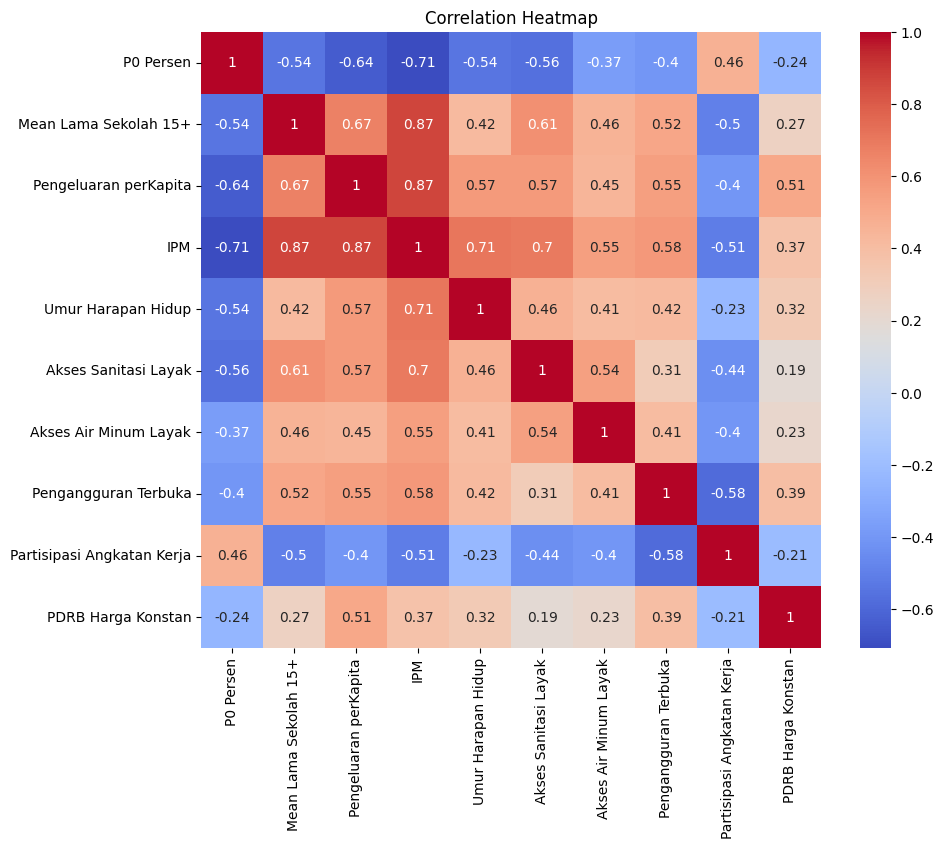

In [8]:
# Visualize data (example: correlation heatmap for numerical features)
numeric_data = dataset.select_dtypes(include=["number"]).drop(columns=["Klasifikasi Kemiskinan"], errors="ignore")
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### **3. Pre-Processing Data**

In [9]:
# Identifikasi kolom numerik
numeric_cols = dataset.select_dtypes(include=['number'])
non_numeric_cols = dataset.select_dtypes(exclude=['number'])

# Handling missing values
dataset[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())  # kolom numerik dengan rata-rata
dataset[non_numeric_cols.columns] = non_numeric_cols.fillna('unknown')   # kolom non-numerik dengan 'unknown'

# Encoding categorical variables 
label_encoders = {}
for column in non_numeric_cols.columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

# Feature scaling 
scaler = StandardScaler()
X = dataset.drop("Klasifikasi Kemiskinan", axis=1) 
y = dataset["Klasifikasi Kemiskinan"]
X_scaled = scaler.fit_transform(X)

### **4. Split Data**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=42)

### **5. Model Random Forest**

In [11]:
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **6. Predict and Evaluate**

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.94      1.00      0.97        16

    accuracy                           0.99       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.99      0.99      0.99       103


Random Forest Accuracy: 99.03%

Confusion Matrix:



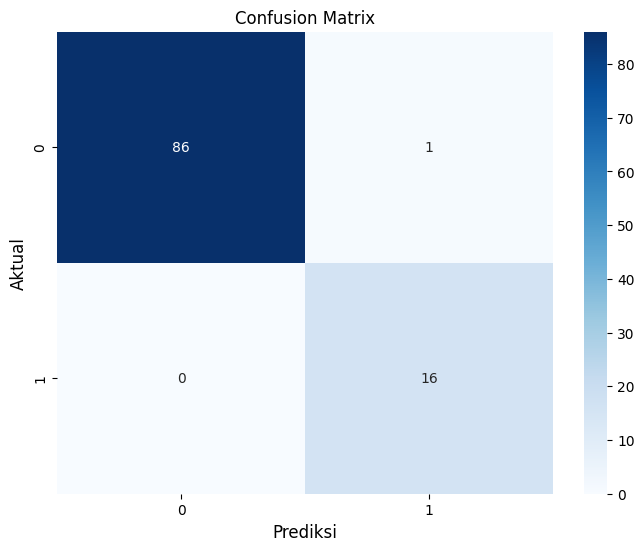

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"\nRandom Forest Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:\n")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Aktual", fontsize=12)
plt.show()